# Queue
队列（queue）是一种遵循先入先出规则的线性数据结构。顾名思义，队列模拟了排队现象，即新来的人不断加入队列尾部，而位于队列头部的人逐个离开。

如图 5-4 所示，我们将队列头部称为“队首”，尾部称为“队尾”，将把元素加入队尾的操作称为“入队”，删除队首元素的操作称为“出队”。
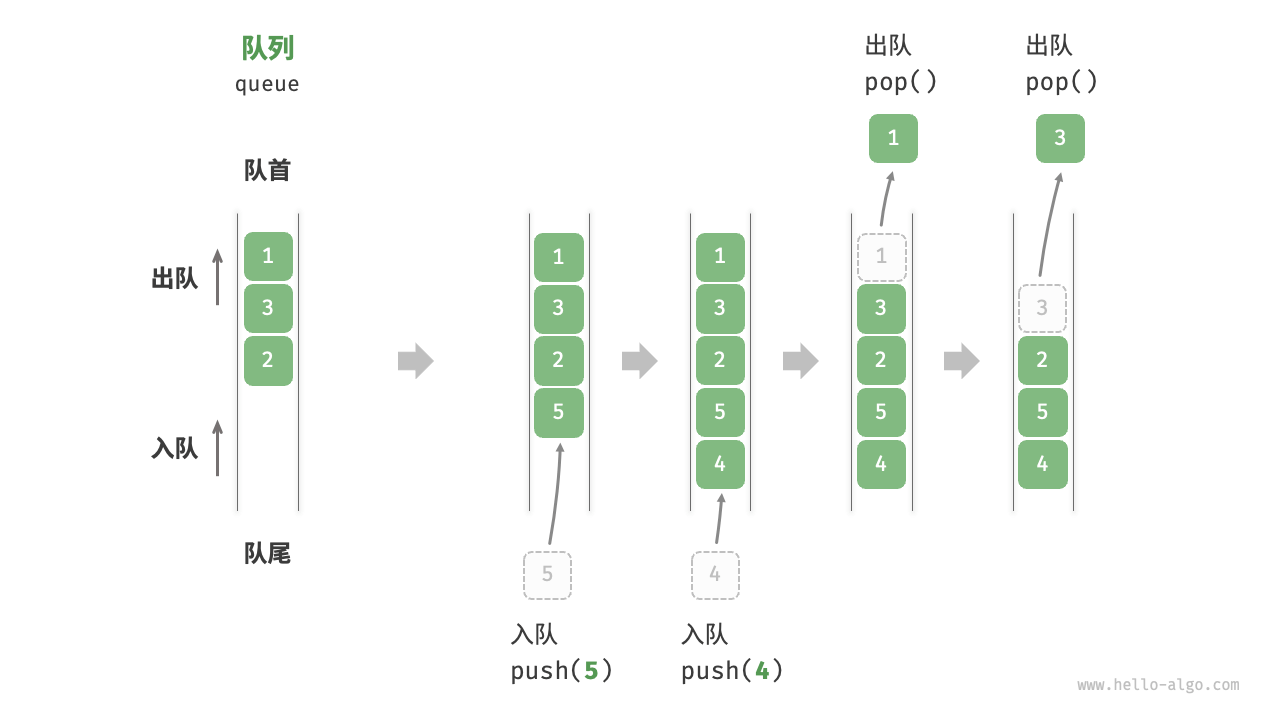

In [1]:
from collections import deque

# 初始化队列
# 在 Python 中，我们一般将双向队列类 deque 当作队列使用
# 虽然 queue.Queue() 是纯正的队列类，但不太好用，因此不推荐
que: deque[int] = deque()

# 元素入队
que.append(1)
que.append(3)
que.append(2)
que.append(5)
que.append(4)

# 访问队首元素
front: int = que[0]

# 元素出队
pop: int = que.popleft()

# 获取队列的长度
size: int = len(que)

# 判断队列是否为空
is_empty: bool = len(que) == 0

In [1]:
class ListNode:
    def __init__(self,val):
        self.next: ListNode =None
        self.val:int = val
class LinkedListQueue:
    def __init__(self) -> None:
        """## 初始化构造,头节点和尾节点和尺寸
        """
        self._front:ListNode | None = None
        self._rear: ListNode | None = None
        self._size: int = 0
    
    def size(self)->int:
        """## 返回尺寸

        ### Returns:
            - `int`: _description_
        """
        return (self._size)
    def is_empty(self)->bool:
        """## 返回是否为空

        ### Returns:
            - `bool`: _description_
        """
        return (self.size()==0)
    def push(self,val):
        """## 入队 先入先出

        ### Args:
            - `val (_type_)`: _description_
        """
        node=ListNode(val)
        if self._front == None:
            self._front = node
            self._rear = node
        else:
            self._rear.next=node
            self._rear=node
        self._size+=1
        
    def pop(self)->int:
        """## 出队

        ### Returns:
            - `int`: _description_
        """
        num =self._front.val
        self._front=self._front.next
        self._size-=1
        return num
    
    def peek(self)->int:
        """## 访问队首元素1

        ### Returns:
            - `int`: _description_
        """
        if self.is_empty():
            return IndexError('Empty queue')
        return self._front.val
    
    def to_list(self)->list[int]:
        """## 转换为列表打印

        ### Returns:
            - `list[int]`: _description_
        """
        arr=[]
        temp=self._front
        while temp:
            num=temp.val
            arr.append(num)
            temp=temp.next
        return arr

queue = LinkedListQueue()
queue.push(1)
queue.push(5)
queue.push(9)
queue.push(6)
peek = queue.peek()
print("队首元素 front =", peek)
print("队列 queue =", queue.to_list())
pop_front = queue.pop()
print("出队元素 pop =", pop_front)
print("出队后 queue =", queue.to_list())

队首元素 front = 1
队列 queue = [1, 5, 9, 6]
出队元素 pop = 1
出队后 queue = [5, 9, 6]


In [25]:
# 基于数组的队列
class ArrayQueue:
    """## 基于环形数组实现的队列
    """
    def __init__(self,size:int) :
        """## 初始化构造，首先得固定好size

        ### Args:
            - `size (int)`: _description_
        """
        self._nums:list[int] = [0]*size
        self._front: int = 0
        self._size: int = 0
    def capacity(self)->int:
        """## 获取队列的容量

        ### Returns:
            - `int`: _description_
        """
        return len(self._nums)
    def size(self)->int:
        """## size

        ### Returns:
            - `int`: _description_
        """
        return self._size
    def is_empty(self)->int:
        """## 判断队列是否为空

        ### Returns:
            - `int`: _description_
        """
        return self._size ==0
    def push(self,val:int):
        """## 入队

        ### Args:
            - `val (int)`: _description_
        """
        
        if self.size()==self.capacity():
            raise IndexError('队列已满')
        # 计算队尾指针，指向队尾索引 + 1
        # 通过取余操作实现 rear 越过数组尾部后回到头部
        rear: int = (self._front + self._size) % self.capacity()
        self._nums[rear]=val
        self._size+=1
        
    def peek(self) -> int:
        """访问队首元素"""
        if self.is_empty():
            raise IndexError("队列为空")
        return self._nums[self._front]
    
    def pop(self)->int:
        """## 出队

        ### Returns:
            - `int`: _description_
        """
        num=self.peek()
        self._front =(self._front+1)%self.capacity()
        self._size-=1
        return num
    
    def to_list(self) -> list[int]:
        """返回列表用于打印"""
        res = [0] * self.size()
        j: int = self._front
        for i in range(self.size()):
            res[i] = self._nums[(j % self.capacity())]
            j += 1
        return res

            
if __name__ == "__main__":
    # 初始化队列
    queue = ArrayQueue(5)

    # 元素入队
    queue.push(1)
    print(queue._front)
    queue.push(3)
    print(queue._front)
    queue.push(2)
    print(queue._front)
    queue.push(5)
    print(queue._front)
    queue.push(4)

    # 访问队首元素
    peek = queue.peek()
    print("队首元素 peek =", peek)
    print(queue.to_list())
    # 元素出队
    pop = queue.pop()
    print("出队元素 pop =", pop)
    print(queue.to_list())
    # 获取队列的长度
    size = queue.size()
    print("队列长度 size =", size)

    # 判断队列是否为空
    is_empty = queue.is_empty()
    print("队列是否为空 =", is_empty)

0
0
0
0
队首元素 peek = 1
[1, 3, 2, 5, 4]
出队元素 pop = 1
[3, 2, 5, 4]
队列长度 size = 4
队列是否为空 = False


In [4]:
# 双向队列 基于链表实现

class ListNode:
    """## 双向链表节点
    """
    def __init__(self,val:int):
        self.val: int = val
        self.prev: ListNode | None = None
        self.next: ListNode | None = None

class LinkedListDeque:
    
    def __init__(self) -> None:
        self._front: ListNode | None = None
        self._rear: ListNode | None = None
        self._size: int = 0
    
    def size(self)->int:
        return self._size
    
    def is_empty(self)->bool:
        return (self._size==0)
    
    def push(self,val:int,is_fornt:bool):
        
        node=ListNode(val)
        if self.is_empty():
            self._front = node
            self._rear = node
        elif is_fornt:
            self._front.prev =node
            node.next = self._front
            self._front = node
        else:
            self._rear.next=node
            node.prev=self._rear
            self._rear=node
        self._size+=1
        
    def push_last(self,val:int):
        """## 队尾入队

        ### Args:
            - `val (int)`: _description_

        ### Returns:
            - `_type_`: _description_
        """
        return (self.push(val,False))
            
    def push_first(self,val:int):
        """## 队首入队

        ### Args:
            - `val (int)`: _description_
        """
        return self.push(val,True)
    def pop(self, is_front: bool) -> int:
        """出队操作"""
        if self.is_empty():
            raise IndexError("双向队列为空")
        # 队首出队操作
        if is_front:
            val: int = self._front.val  # 暂存头节点值
            # 删除头节点
            fnext: ListNode | None = self._front.next
            if fnext != None:
                fnext.prev = None
                self._front.next = None
            self._front = fnext  # 更新头节点
        # 队尾出队操作
        else:
            val: int = self._rear.val  # 暂存尾节点值
            # 删除尾节点
            rprev: ListNode | None = self._rear.prev
            if rprev != None:
                rprev.next = None
                self._rear.prev = None
            self._rear = rprev  # 更新尾节点
        self._size -= 1  # 更新队列长度
        return val

    def pop_first(self) -> int:
        """队首出队"""
        return self.pop(True)

    def pop_last(self) -> int:
        """队尾出队"""
        return self.pop(False)

    def peek_first(self) -> int:
        """访问队首元素"""
        if self.is_empty():
            raise IndexError("双向队列为空")
        return self._front.val

    def peek_last(self) -> int:
        """访问队尾元素"""
        if self.is_empty():
            raise IndexError("双向队列为空")
        return self._rear.val

    def to_list(self) -> list[int]:
        """返回数组用于打印"""
        node = self._front
        res = [0] * self.size()
        for i in range(self.size()):
            res[i] = node.val
            node = node.next
        return res
    
# 初始化队列
queue = LinkedListDeque()

# 元素入队
queue.push_first(1)
print(queue._front)
queue.push_first(3)
print(queue._front)
queue.push_first(2)
print(queue._front)
queue.push_first(5)
print(queue._front)
queue.push_first(4)


print(queue.to_list())
# 元素出队
pop = queue.pop_last()
print("出队元素 pop =", pop)
print(queue.to_list())
# 获取队列的长度
size = queue.size()
print("队列长度 size =", size)

# 判断队列是否为空
is_empty = queue.is_empty()
print("队列是否为空 =", is_empty)

[4, 5, 2, 3, 1]
出队元素 pop = 1
[4, 5, 2, 3]
队列长度 size = 4
队列是否为空 = False
